# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#print(weather_api_key)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#!pip install citipy

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#loop through cities
#city1 = ["Stockholm", "Houston"]

results = []

for city in cities:
    url_city = url + "&q=" + city
    #print(url_city)
    
    #exception for errors
    try:
        city_weather = requests.get(url_city).json()
        #print(city_weather)
        results.append(city_weather)
    except:
        print("{} not found".format(city))
        pass
    


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#print(results[0])
#print(" ")
city_data = []

for result in results:
    try:
        #if 'name' in result:
        city_name = result['name']
        city_lat = result['coord']['lat']
        city_lon = result['coord']['lon']
        max_temp = result['main']['temp_max']
        hum = result['main']['humidity']
        cloud = result['clouds']['all']
        wind = result['wind']['speed']
        date = result['dt']
        city_data.append({"City": city_name, "Lat": city_lat, "Lon": city_lon, "Max Temp": max_temp, "Humidity": hum,
                          "Cloudiness": cloud, "Wind Speed": wind, "Date": date})
    except:
        pass

city_df = pd.DataFrame(city_data)

city_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Toktogul,41.8708,72.9402,43.16,42,98,1.34,1616196622
1,Sayville,40.7359,-73.0821,39.20,28,1,12.66,1616196622
2,Norman Wells,65.2820,-126.8329,-0.40,71,75,20.71,1616196622
3,Bluff,-46.6000,168.3333,57.00,84,97,4.00,1616196623
4,Busselton,-33.6500,115.3333,71.33,43,96,4.05,1616196461


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df.describe()
new_city_df = city_df[city_df['Humidity'] < 100]

In [8]:
#max humidity is found to be 100.00, therefore none need to be removed

In [9]:
#  Get the indices of cities that have humidity over 100%.

#N/A

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [18]:
#create csv to write dataframe to
#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)
city_df.to_csv('city_data.csv',index=False)

## Latitude vs. Temperature Plot

In [19]:
city_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Toktogul,41.8708,72.9402,43.16,42,98,1.34,1616196622
1,Sayville,40.7359,-73.0821,39.20,28,1,12.66,1616196622
2,Norman Wells,65.2820,-126.8329,-0.40,71,75,20.71,1616196622
3,Bluff,-46.6000,168.3333,57.00,84,97,4.00,1616196623
4,Busselton,-33.6500,115.3333,71.33,43,96,4.05,1616196461


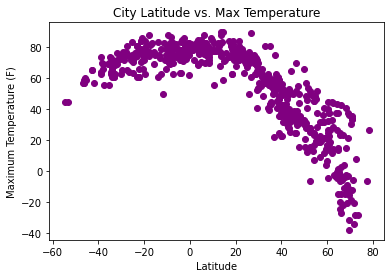

In [20]:
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x,y, color= 'purple')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('City Latitude vs. Max Temperature')

plt.show()

## Latitude vs. Humidity Plot

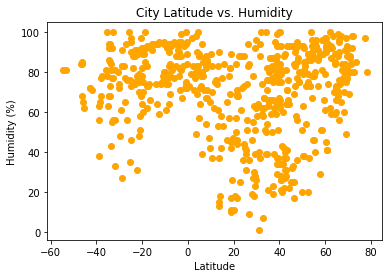

In [23]:
x = city_df['Lat']
y = city_df['Humidity']

plt.scatter(x,y, color= 'orange')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.show()

## Latitude vs. Cloudiness Plot

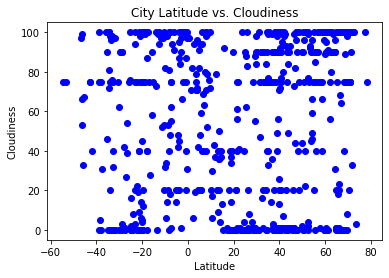

In [24]:
x = city_df['Lat']
y = city_df['Cloudiness']

plt.scatter(x,y, color= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

plt.show()

## Latitude vs. Wind Speed Plot

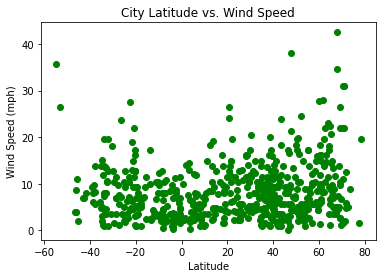

In [25]:
x = city_df['Lat']
y = city_df['Wind Speed']

plt.scatter(x,y, color= 'green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.87


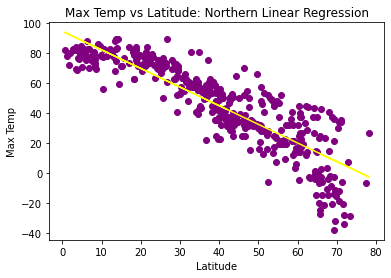

In [38]:
#lat > 0
n1_df = city_df[city_df['Lat'] > 0]

cor_coef1 = round(st.pearsonr(n1_df['Lat'], n1_df['Max Temp'])[0],2)
print(f'The r-value is: {cor_coef1}')

x = n1_df['Lat']
y = n1_df['Max Temp']
line_model = st.linregress(x,y)
yval=x*line_model[0] + line_model[1]

plt.scatter(x,y, color= 'purple')
plt.plot(x,yval,color='yellow')
(m,b)=np.polyfit(x ,y ,1)
yp = np.polyval([m,b],x)
equation = 'y = ' + str(round(m,4)) + 'x' ' + ' + str(round(b,4))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp vs Latitude: Northern Linear Regression')
#text(0, 1,'matplotlib', horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


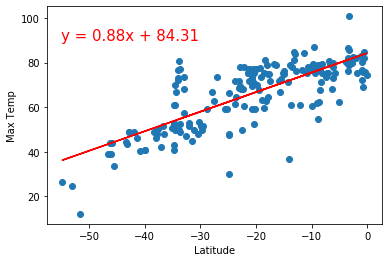

In [26]:
#lat < 0
n1_df = city_df[city_df['Lat'] > 0]

cor_coef1 = round(st.pearsonr(n1_df['Lat'], n1_df['Max Temp'])[0],2)
print(f'The r-value is: {cor_coef1}')

x = n1_df['Lat']
y = n1_df['Max Temp']
line_model = st.linregress(x,y)
yval=x*line_model[0] + line_model[1]

plt.scatter(x,y, color= 'purple')
plt.plot(x,yval,color='yellow')
(m,b)=np.polyfit(x ,y ,1)
yp = np.polyval([m,b],x)
equation = 'y = ' + str(round(m,4)) + 'x' ' + ' + str(round(b,4))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Max Temp vs Latitude: Northern Linear Regression')
#text(0, 1,'matplotlib', horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


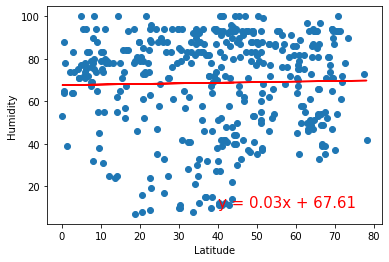

In [27]:
#lat > 0

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


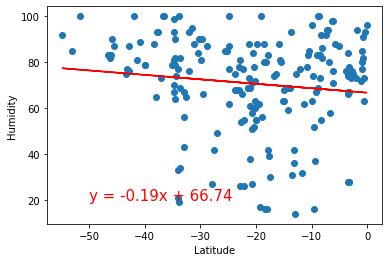

In [28]:
#lat < 0

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


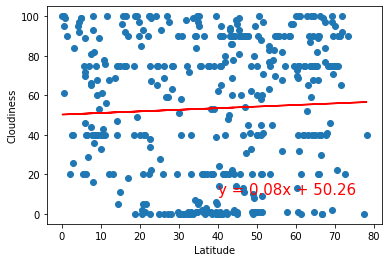

In [29]:
#lat > 0

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


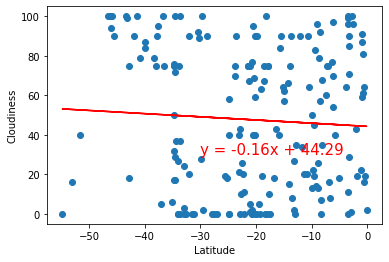

In [30]:
#lat < 0

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


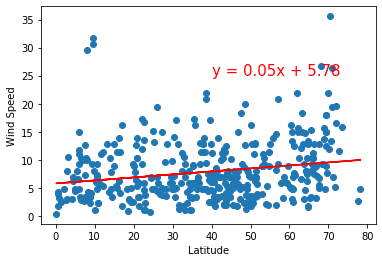

In [31]:
#lat > 0

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


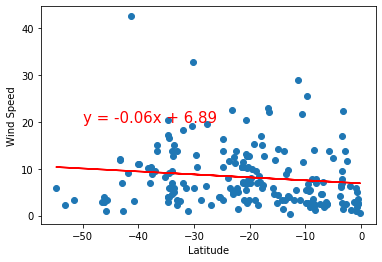

In [32]:
#lat < 0